In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OnlineNewsPopularity.csv to OnlineNewsPopularity (1).csv
User uploaded file "OnlineNewsPopularity.csv" with length 24311769 bytes


In [3]:
#Carga de Dataset
df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=',')

In [ ]:
df.info()

In [4]:
#Tome la transformación Log de la la caracteristica(variable/feature) "n_tokens_content",
#que representa el número de palabras (tokens) en un artículo de noticias.
df['log_n_tokens_content'] = np.log10(df[' n_tokens_content'] + 1)

In [16]:
#Entrene dos modelos de regresión lineal para predecir el número de acciones de un artículo,
#uno usando la característica original y el otro la versión transformada logarítmicamente.
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, df[[' n_tokens_content']],
                              df[' shares'], cv=10)
m_log = linear_model.LinearRegression()
scores_log= cross_val_score(m_log, df[['log_n_tokens_content']],
                              df[' shares'], cv=10)

In [25]:
#Métrica Coeficiente de determinación R^2
print("Puntuación R-Squared sin transformación logarítmica: %0.5f (+/- %0.5f)"
        % (scores_orig.mean(), scores_orig.std() * 2))   
print()
print("Puntuación R-Squared con transformación logarítmica: %0.5f (+/- %0.5f)"
        % (scores_log.mean(), scores_log.std() * 2))  

Puntuación R-Squared sin transformación logarítmica: -0.00242 (+/- 0.00509)

Puntuación R-Squared con transformación logarítmica: -0.00114 (+/- 0.00418)


Text(0, 0.5, 'N° de Comptes')

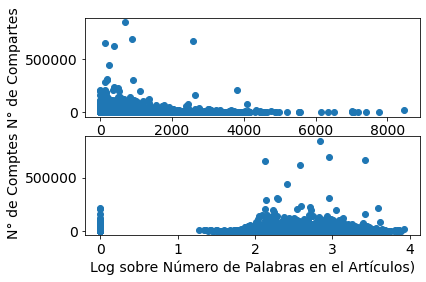

In [28]:
#Gráfico de Correlación
# Aplicación de Engineering Features - Función Log-Transformation
fig, (ax1,ax2) = plt.subplots(2,1)

ax1.scatter(df[' n_tokens_content'],df[' shares'])
ax1.tick_params(labelsize = 14)
ax1.set_xlabel('Número de Palabras en el Artículos', fontsize = 14)
ax1.set_ylabel('N° de Compartes', fontsize = 14)

# Transformación Logaritmica
ax2.scatter(df['log_n_tokens_content'],df[' shares'])
ax2.tick_params(labelsize = 14)
ax2.set_xlabel('Log sobre Número de Palabras en el Artículos)', fontsize = 14)
ax2.set_ylabel('N° de Comptes', fontsize = 14)